In [1]:
import numpy as np
import pandas as pd
from tsne import tsne
import matplotlib.pyplot as plt

In [2]:
directory = "./"

train_data = pd.read_csv(directory+'train.csv')
test_data = pd.read_csv(directory+'test.csv')

train_x = train_data.drop(['id', 'label'], axis = 1).values
train_y = train_data['label'].values
test_x = test_data.drop(['id', 'label'], axis=1).values
test_y = test_data['label'].values

In [3]:
# print(train_x.shape)
# print(test_x.shape)
# print(train_y)

train_x = np.where(train_x >= 127, 1, 0)
test_x = np.where(test_x >= 127, 1, 0)
# print(h_choices[0, np.arange(10)])

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
# a = np.random.randn(10)
# print(a)
# print(sigmoid(a/2 -1))

# print(np.outer(np.arange(5), np.arange(10)))

200 1e-07 3
Done


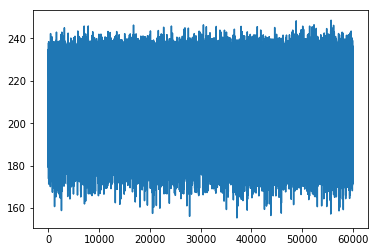

(10000, 200)
[1 1 1 1 0 0 1 0 1 0 0 0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 0 0 0 1 0 1 0
 1 1 1 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 1 1 1
 0 1 1 0 0 1 0 1 1 1 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 1 1 1 0 0 1
 0 0 0 1 1 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 0 1 1
 1 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 1 0 1 1 1
 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0]
Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point 0 of 10000...
Computing P-values for point 500 of 10000...
Computing P-values for point 1000 of 10000...
Computing P-values for point 1500 of 10000...
Computing P-values for point 2000 of 10000...
Computing P-values for point 2500 of 10000...
Computing P-values for point 3000 of 10000...
Computing P-values for point 3500 of 10000...
Computing P-values for point 4000 of 10000...
Computing P-values for point 4500 of 10000...
Computing P-values for point 5000 of 10000...
Computing 

<Figure size 432x288 with 0 Axes>

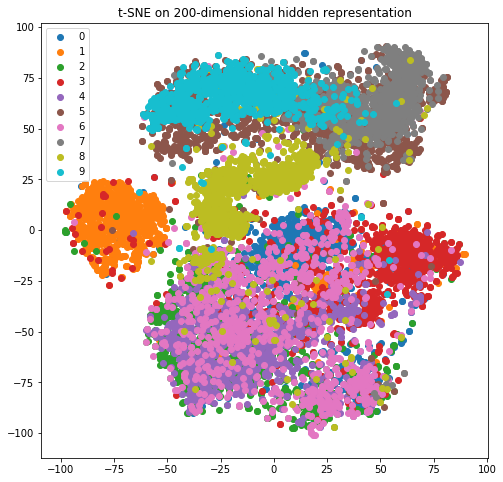

<Figure size 432x288 with 0 Axes>

In [5]:
# h_ns = [50, 150]
# lrs = [.000001, 0.0000001, .00000001]
# ks = [1, 3, 5, 10, 20]

h_ns = [200]
lrs = [0.0000001]
ks = [1, 20]
for k in ks:
    for h_n in h_ns:
        for learning_rate in lrs:
            print(h_n, learning_rate, k)
    #         h_n = 100
            v_m = 784

            W = np.random.randn(h_n, v_m)
            b = np.random.randn(v_m)-2
            c = np.random.randn(h_n)-2
#             k = 10
    #         learning_rate = .00000001

            norms = []

            for x in train_x:

                v_t = np.copy(x)
                h_t = np.zeros(h_n)

                for _ in range(k):
            #         for i in range(h_n):
                    pro_samples = np.random.rand(h_n)
                    probs = sigmoid(np.matmul(W, v_t) + c)
                    h_t = np.where(probs < pro_samples, 1, 0)

                    pro_samples = np.random.rand(v_m)
                    probs = sigmoid(np.matmul(h_t.T, W) + b)
                    v_t = np.where(probs < pro_samples, 1, 0)

                update_c_by_vd = sigmoid(np.matmul(W, x) + c)
                update_c_by_vt = sigmoid(np.matmul(W, v_t) + c)
            #     print(update_c_by_vd.shape)
            #     print(update_c_by_vd.T)a
                update_W_by_vd = np.outer(update_c_by_vd, x)
                update_W_by_vt = np.outer(update_c_by_vt, v_t)
            #     print(update_W_by_vd.shape)

                norms.append(np.linalg.norm(update_W_by_vd - update_W_by_vt)+ \
                             np.linalg.norm(x - v_t) + \
                             np.linalg.norm(update_c_by_vd - update_c_by_vt))

                W = W + learning_rate * (update_W_by_vd - update_W_by_vt)
                b = b + learning_rate * (x - v_t)
                c = c + learning_rate * (update_c_by_vd - update_c_by_vt)
            #     input()

            print("Done")
            plt.plot(norms)
            plt.show()
            plt.clf()

            probs = sigmoid(np.matmul(test_x, W.T) + c)
            pro_samples = np.random.rand(test_x.shape[0], h_n)

            hidden_rep = np.where(probs < pro_samples, 1, 0)
#             hidden_rep = probs

            print(hidden_rep.shape)
            print(hidden_rep[np.random.randint(0, test_x.shape[0])])

            hidden_rep = hidden_rep[:2500]
            labels = test_y[:2500]

            Y= tsne(hidden_rep, 2, h_n, 20.0)
            fig, ax = plt.subplots(figsize=(8,8))
            for g in np.unique(labels):
                i = np.where(test_y == g)
                ax.scatter(Y[i,0], Y[i,1], label=int(g))
            plt.title("t-SNE on "+str(h_n)+"-dimensional hidden representation")
            plt.legend()
            plt.savefig(directory+"clusters_"+str(h_n)+"_"+str(learning_rate).replace('.','')+"_"+str(k)+".png")
            plt.show()
            plt.clf()